In [1]:
import os,csv,re
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score
from stMMR.utils import *
from stMMR.process import *
from stMMR import train_model
import scanpy as sc

In [2]:
adata = sc.read_h5ad("../Data/HD/filtered_HD.h5ad")
adata.var_names_make_unique()

In [3]:
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
adata.obsm["adj"] = calculate_adj_matrix(adata)

In [4]:
adata= train_model.train(adata,10,n_epochs=50,h=[1000,1000],l=1,lr=0.00001)

[2024-10-01 17:11:34] Epoch: 0/50, Loss: 12.3521
[2024-10-01 17:11:40] Epoch: 5/50, Loss: 12.1897
[2024-10-01 17:11:47] Epoch: 10/50, Loss: 12.0585
[2024-10-01 17:11:54] Epoch: 15/50, Loss: 11.9605
[2024-10-01 17:12:01] Epoch: 20/50, Loss: 11.8773
[2024-10-01 17:12:08] Epoch: 25/50, Loss: 11.7948
[2024-10-01 17:12:14] Epoch: 30/50, Loss: 11.7083
[2024-10-01 17:12:21] Epoch: 35/50, Loss: 11.6145
[2024-10-01 17:12:27] Epoch: 40/50, Loss: 11.5090
[2024-10-01 17:12:34] Epoch: 45/50, Loss: 11.3816


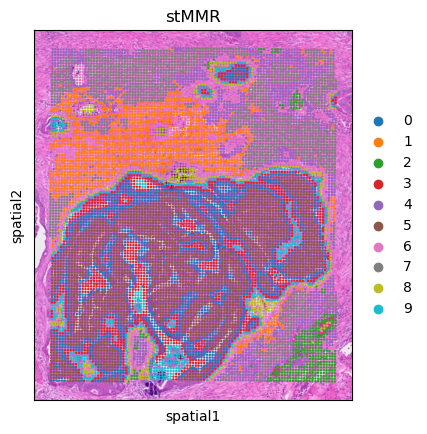

In [5]:
sc.pl.spatial(adata, color="stMMR",title='stMMR',s=2)